In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
print("Current launch location: ", os.getcwd())

Current launch location:  d:\ing3\Compression-video\TVID-Project\src


In [51]:
filename = "../data/elementary/pendulum/55.pgm"

with open(filename, "rb") as f:
    # read the header
    header = f.readline()
    assert header == b"P5\n"

    # read the size
    size = f.readline()
    width, height = [int(x) for x in size.split()]

    # read the max value
    maxval = f.readline()
    assert maxval == b"255\n"

    # read the data
    data = f.read()

    # convert the data to a numpy array
    img = np.frombuffer(data, dtype=np.uint8)
    img = img.reshape((height, width))

Image size:  (720, 720)


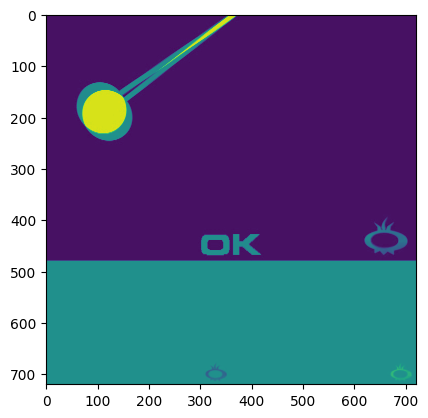

In [52]:
print("Image size: ", img.shape)
plt.imshow(img)

In [53]:
img[600, 500]

128

In [59]:
def read_yuv_pgm(img, width, height):
    """
    Reads a YUV PGM file into a np array.
    """
    y_width = width
    y_height = height * 2 // 3
    uv_width = width // 2

    y = img[:y_height, :y_width]

    u = img[y_height:, :uv_width]
    v = img[y_height:, uv_width:]

    u = np.repeat(u, 2, axis=0)
    v = np.repeat(v, 2, axis=0)

    u = np.repeat(u, 2, axis=1)
    v = np.repeat(v, 2, axis=1)

    return np.dstack((y, u, v))

YUV_img = read_yuv_pgm(img, width, height)
print("YUV image size: ", YUV_img.shape)

YUV image size:  (480, 720, 3)


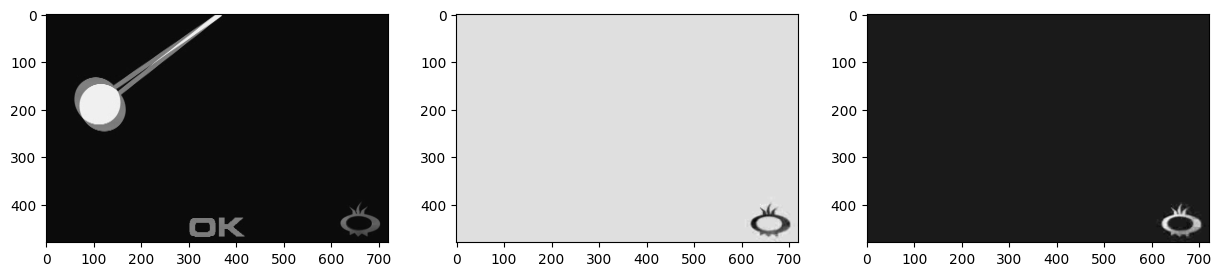

In [64]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(YUV_img[:, :, 0], cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(YUV_img[:, :, 1], cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(YUV_img[:, :, 2], cmap="gray")

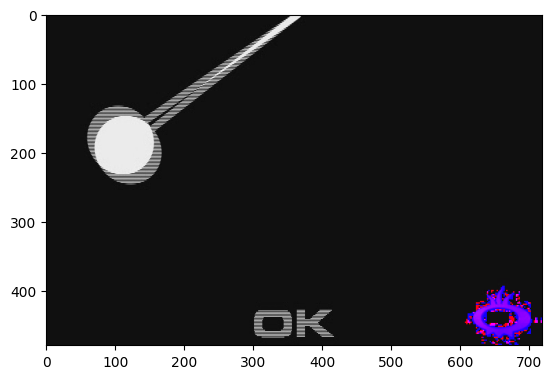

In [74]:
def yuv_to_rgb(yuv_img):
    """
    Converts a YUV image to RGB.
    """
    y = yuv_img[:, :, 0]
    u = yuv_img[:, :, 1]
    v = yuv_img[:, :, 2]

    r = np.clip(y + 1.402 * (v - 128), 0, 255)
    g = np.clip(y - 0.344136 * (u - 128) - 0.714136 * (v - 128), 0, 255)
    b = np.clip(y + 1.772 * (u - 128), 0, 255)

    return np.dstack((r, g, b)).astype(np.uint8)

RGB_img = yuv_to_rgb(YUV_img)
plt.imshow(RGB_img)

In [56]:
y = YUV_img[2, 2, 0]
u = YUV_img[2, 2, 1]
v = YUV_img[2, 2, 2]

print("Y: ", y)
print("U: ", u)
print("V: ", v)

r = np.clip(y + 1.402 * (v - 128), 0, 255)
g = np.clip(y - 0.344136 * (u - 128) - 0.714136 * (v - 128), 0, 255)
b = np.clip(y + 1.772 * (u - 128), 0, 255)

print("R: ", r)
print("G: ", g)
print("B: ", b)
RGB_img[450, 680]

Y:  16
U:  128
V:  128
R:  16.0
G:  16.0
B:  16.0


array([ 94,   0, 255], dtype=uint8)

In [24]:
def convertYUVtoRGB(yuv):
    # convert the image to RGB
    rgb = np.zeros((height, width, 3), dtype=np.uint8)
    rgb[:,:,0] = yuv[:,:,0] + 1.402 * (yuv[:,:,2] - 128)
    rgb[:,:,1] = yuv[:,:,0] - 0.344 * (yuv[:,:,1] - 128) - 0.714 * (yuv[:,:,2] - 128)
    rgb[:,:,2] = yuv[:,:,0] + 1.772 * (yuv[:,:,1] - 128)
    return rgb

# Display the RGB image
plt.figure()
plt.imshow(convertYUVtoRGB(img))

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

<Figure size 640x480 with 0 Axes>